In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the data
data = pd.read_csv('../../data/processed-v2.csv')

In [4]:
# Quick overview of the dataset
print(data.head())
print(data.info())
print(data.describe())


   product_id    mrp  ram  inbuilt_storage  weight  battery_power   
0  B09TWH8YHM  18499    8              128     215           6000  \
1  B0B4F38D6K  12999    6              128     207           6000   
2  B0B56YRDDT   7799    4               64     194           5000   
3  B0BZ466BWW  12999    6              128     190           5000   
4  B0BYN48MQW   8799    4               64     192           5000   

   battery_type  form_factor  length  width  ...  phone_warranty (months)   
0             0            5    16.5    7.7  ...                       12  \
1             0            5    16.5    7.7  ...                       12   
2             1            0    16.5    7.6  ...                       12   
3             0            7    16.6    7.6  ...                       12   
4             1            0    16.9    7.6  ...                       12   

   camera_count  cam_has_AI  cam_has_OIS  cam_has_Zoom  cam_has_HDR   
0             6           0            0           

In [5]:
# Check for missing values
print(data.isnull().sum())

product_id                 0
mrp                        0
ram                        0
inbuilt_storage            0
weight                     0
battery_power              0
battery_type               0
form_factor                0
length                     0
width                      0
height                     0
os_name                    0
os_version                 0
phone_warranty (months)    0
camera_count               0
cam_has_AI                 0
cam_has_OIS                0
cam_has_Zoom               0
cam_has_HDR                0
cam_has_Macro              0
cam_has_Portrait           0
main_camera_MP             0
is_success                 0
dtype: int64


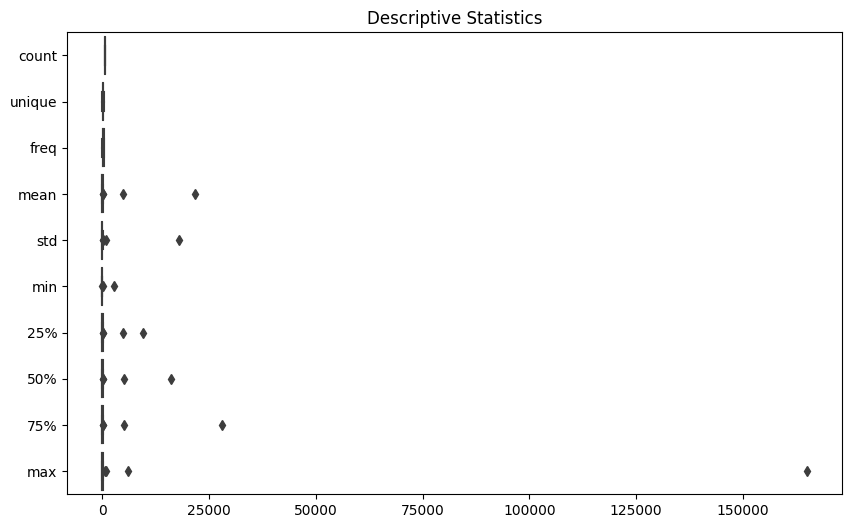

,product_id,mrp,ram,inbuilt_storage,weight,battery_power,battery_type,form_factor,length,width,...,phone_warranty (months),camera_count,cam_has_AI,cam_has_OIS,cam_has_Zoom,cam_has_HDR,cam_has_Macro,cam_has_Portrait,main_camera_MP,is_success
count,634,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,...,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634
unique,294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,B07WDKLDRX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330
mean,NaN,21774.761830,6.126183,114.847003,213.258675,4739.429022,0.438486,2.960568,16.279842,7.627104,...,11.362776,2.507886,0.211356,0.209779,0.208202,0.208202,0.206625,0.211356,20.152997,NaN
std,NaN,17850.186021,2.899557,72.708339,75.901403,904.055729,0.496593,3.455429,1.519880,1.076708,...,2.846400,1.199302,0.408593,0.407472,0.406343,0.406343,0.405203,0.408593,17.995882,NaN
min,NaN,2790.000000,0.000000,0.000000,90.000000,10.000000,0.000000,0.000000,5.000000,1.500000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,NaN
25%,NaN,9499.000000,4.000000,64.000000,188.000000,4700.000000,0.000000,0.000000,16.100000,7.500000,...,12.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,NaN
50%,NaN,15990.000000,6.000000,128.000000,195.000000,5000.000000,0.000000,0.000000,16.400000,7.600000,...,12.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,NaN
75%,NaN,27999.000000,8.000000,128.000000,205.000000,5000.000000,1.000000,7.000000,16.500000,7.700000,...,12.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,NaN


In [6]:
# Descriptive Statistics
desc_stats = data.describe(include='all')

# Plotting the descriptive statistics
plt.figure(figsize=(10, 6))
sns.boxplot(data=desc_stats.T, orient="h")
plt.title("Descriptive Statistics")
plt.show()

desc_stats


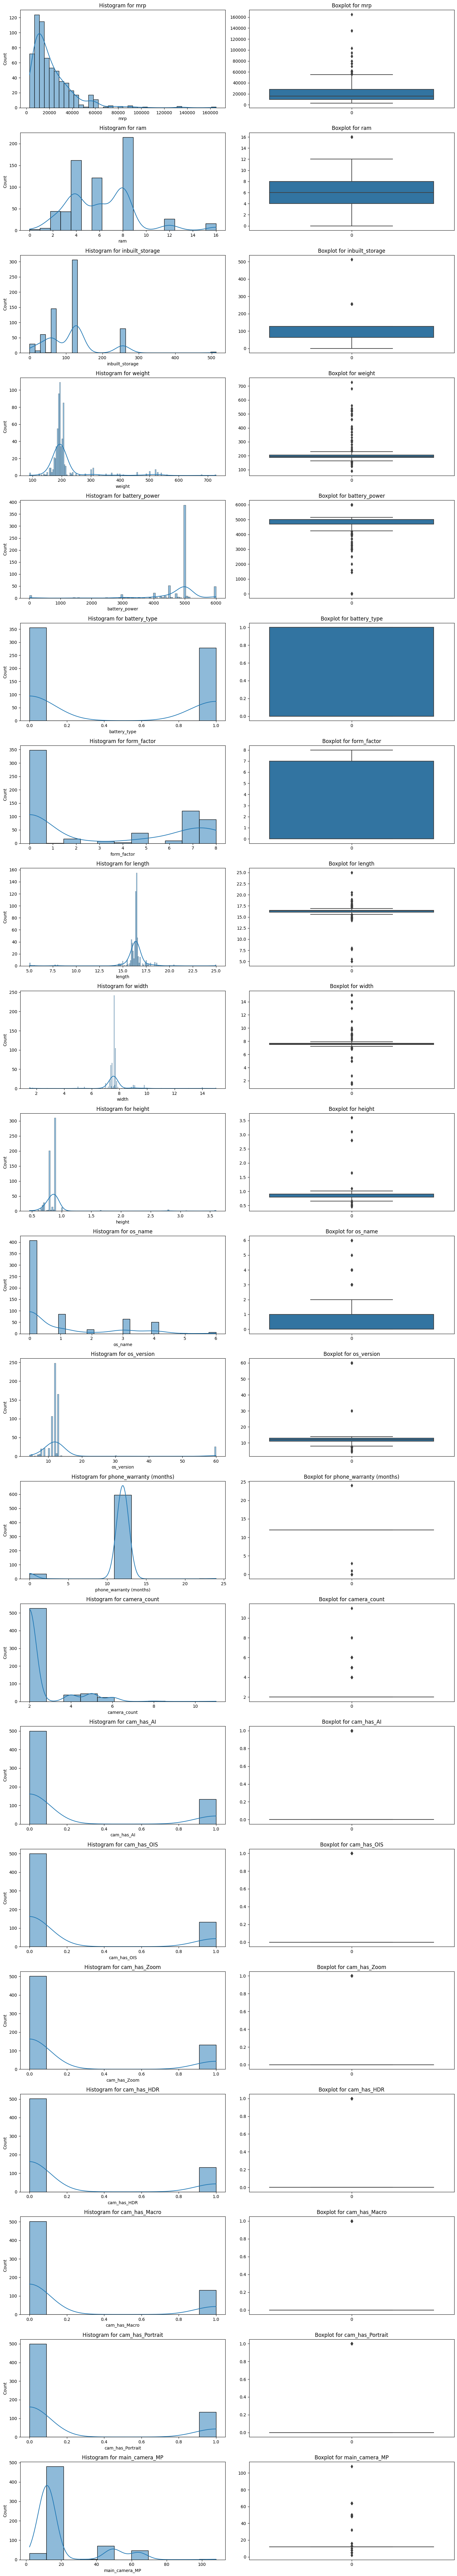

In [7]:
# Numerical Feature Analysis
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

fig, axs = plt.subplots(len(numerical_features), 2, figsize=(15, 4*len(numerical_features)))

for i, col in enumerate(numerical_features):
    sns.histplot(data[col], kde=True, ax=axs[i, 0])
    axs[i, 0].set_title('Histogram for ' + col)
    
    sns.boxplot(data[col], ax=axs[i, 1])
    axs[i, 1].set_title('Boxplot for ' + col)

plt.tight_layout()
# Save the figure as PNG
plt.savefig('numerical_feature_analysis.png', dpi=300)

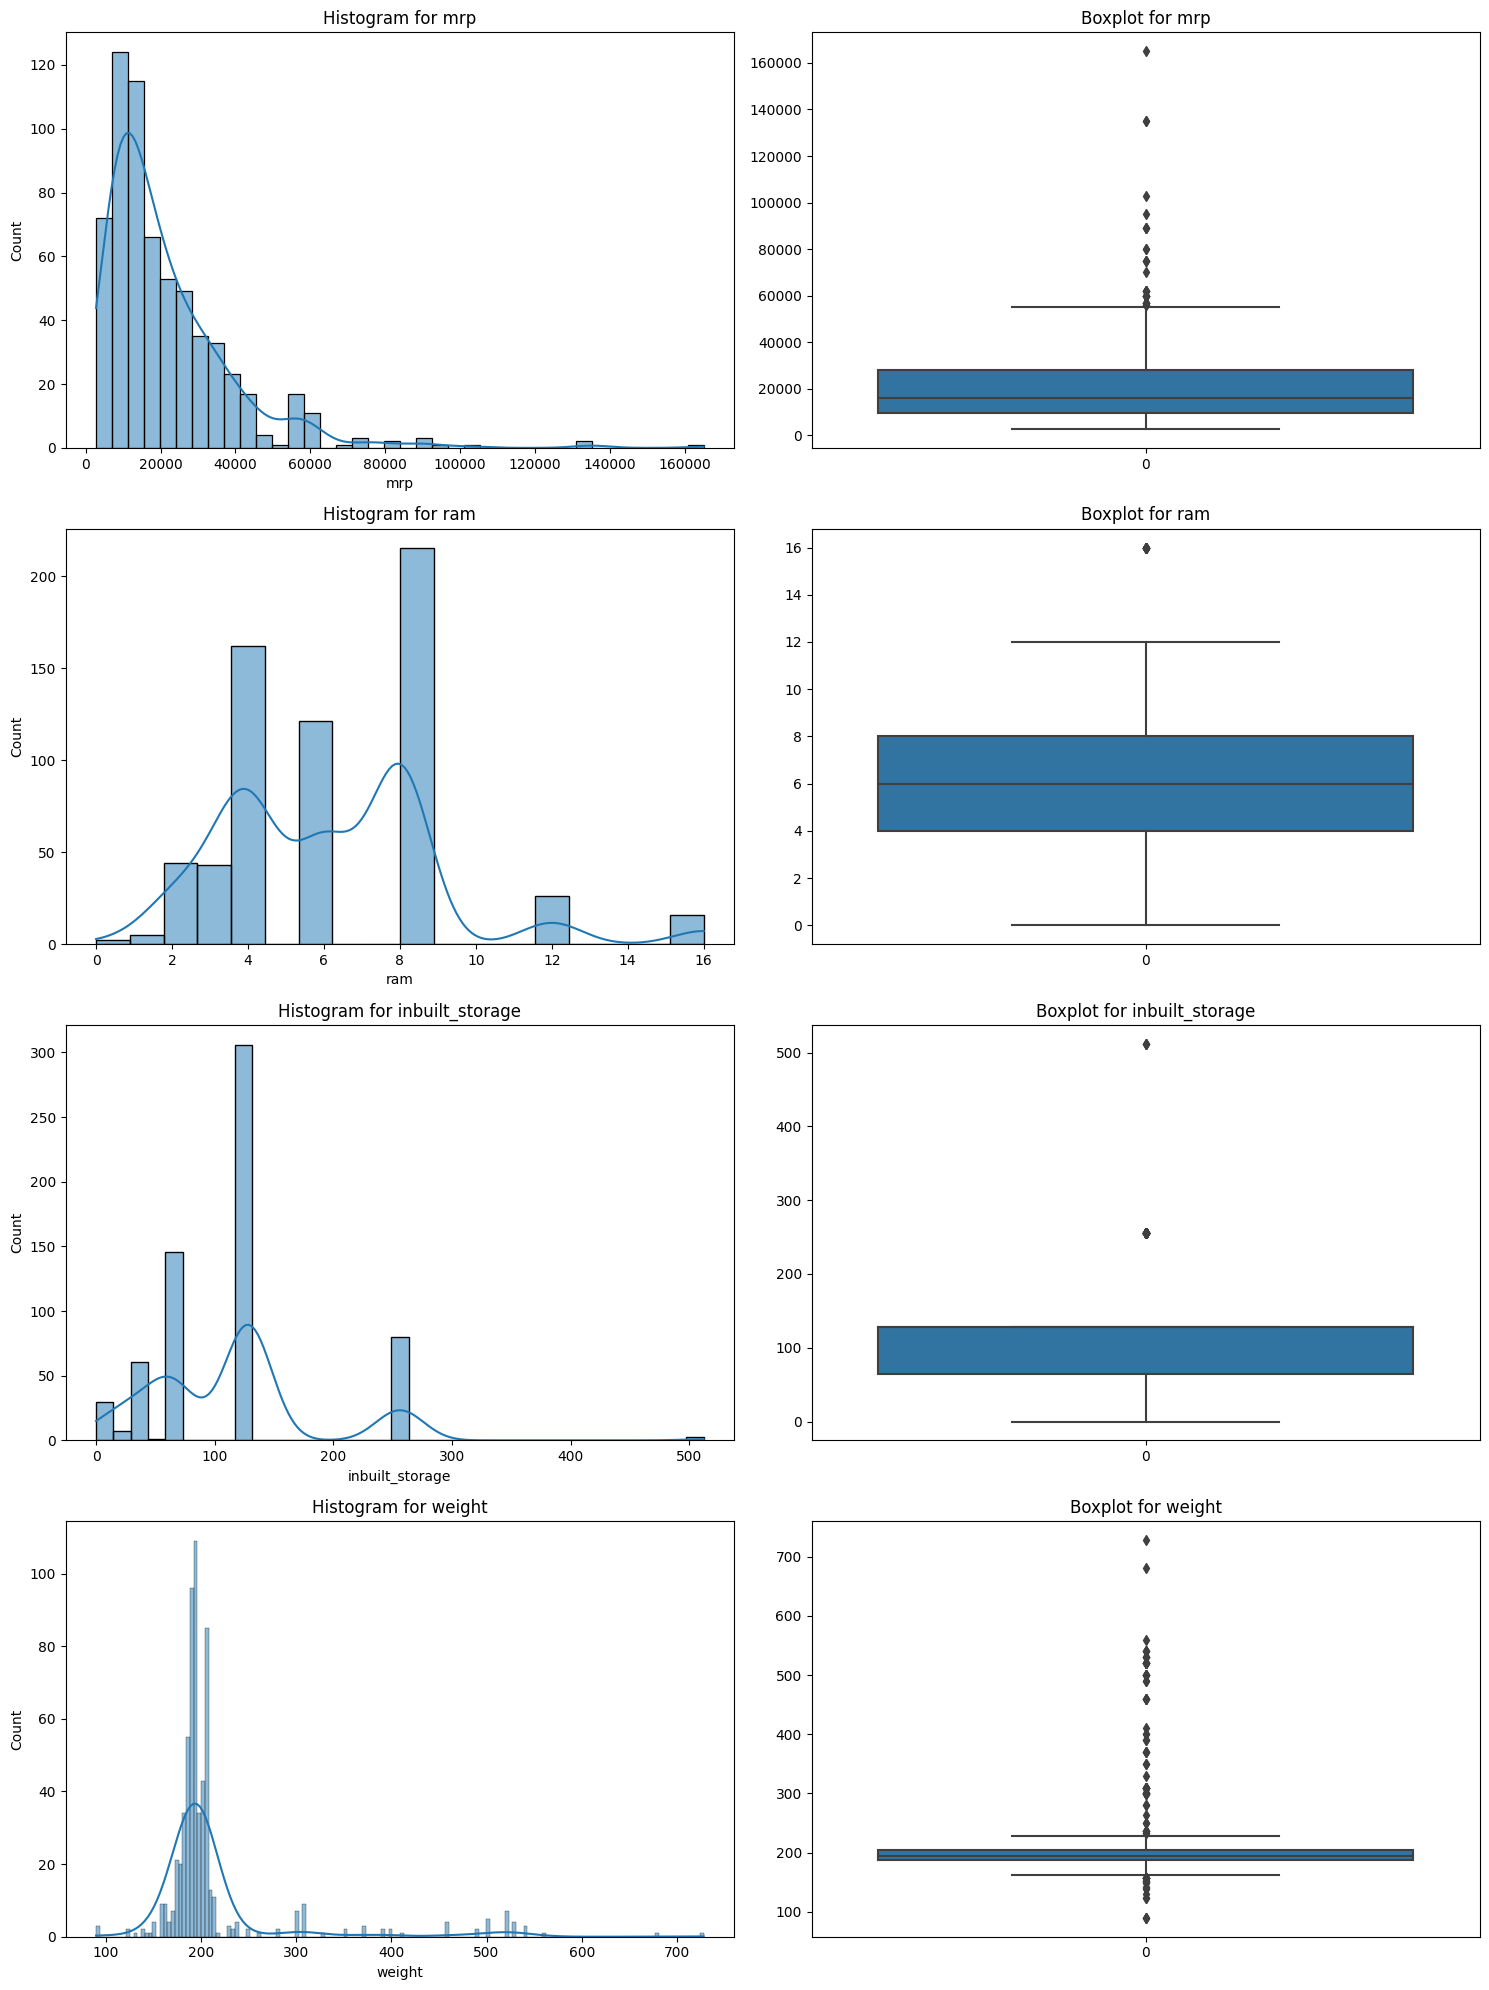

In [11]:
# Define the numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Define the function to plot the features
def plot_features(features, start_index):
    fig, axs = plt.subplots(4, 2, figsize=(15, 20))

    for i in range(4):
        if start_index+i < len(features):
            col = features[start_index+i]
            sns.histplot(data[col], kde=True, ax=axs[i, 0])
            axs[i, 0].set_title('Histogram for ' + col)

            sns.boxplot(data[col], ax=axs[i, 1])
            axs[i, 1].set_title('Boxplot for ' + col)

    plt.tight_layout()
    plt.show()

# Plot the first 4 features
plot_features(numerical_features, 0)

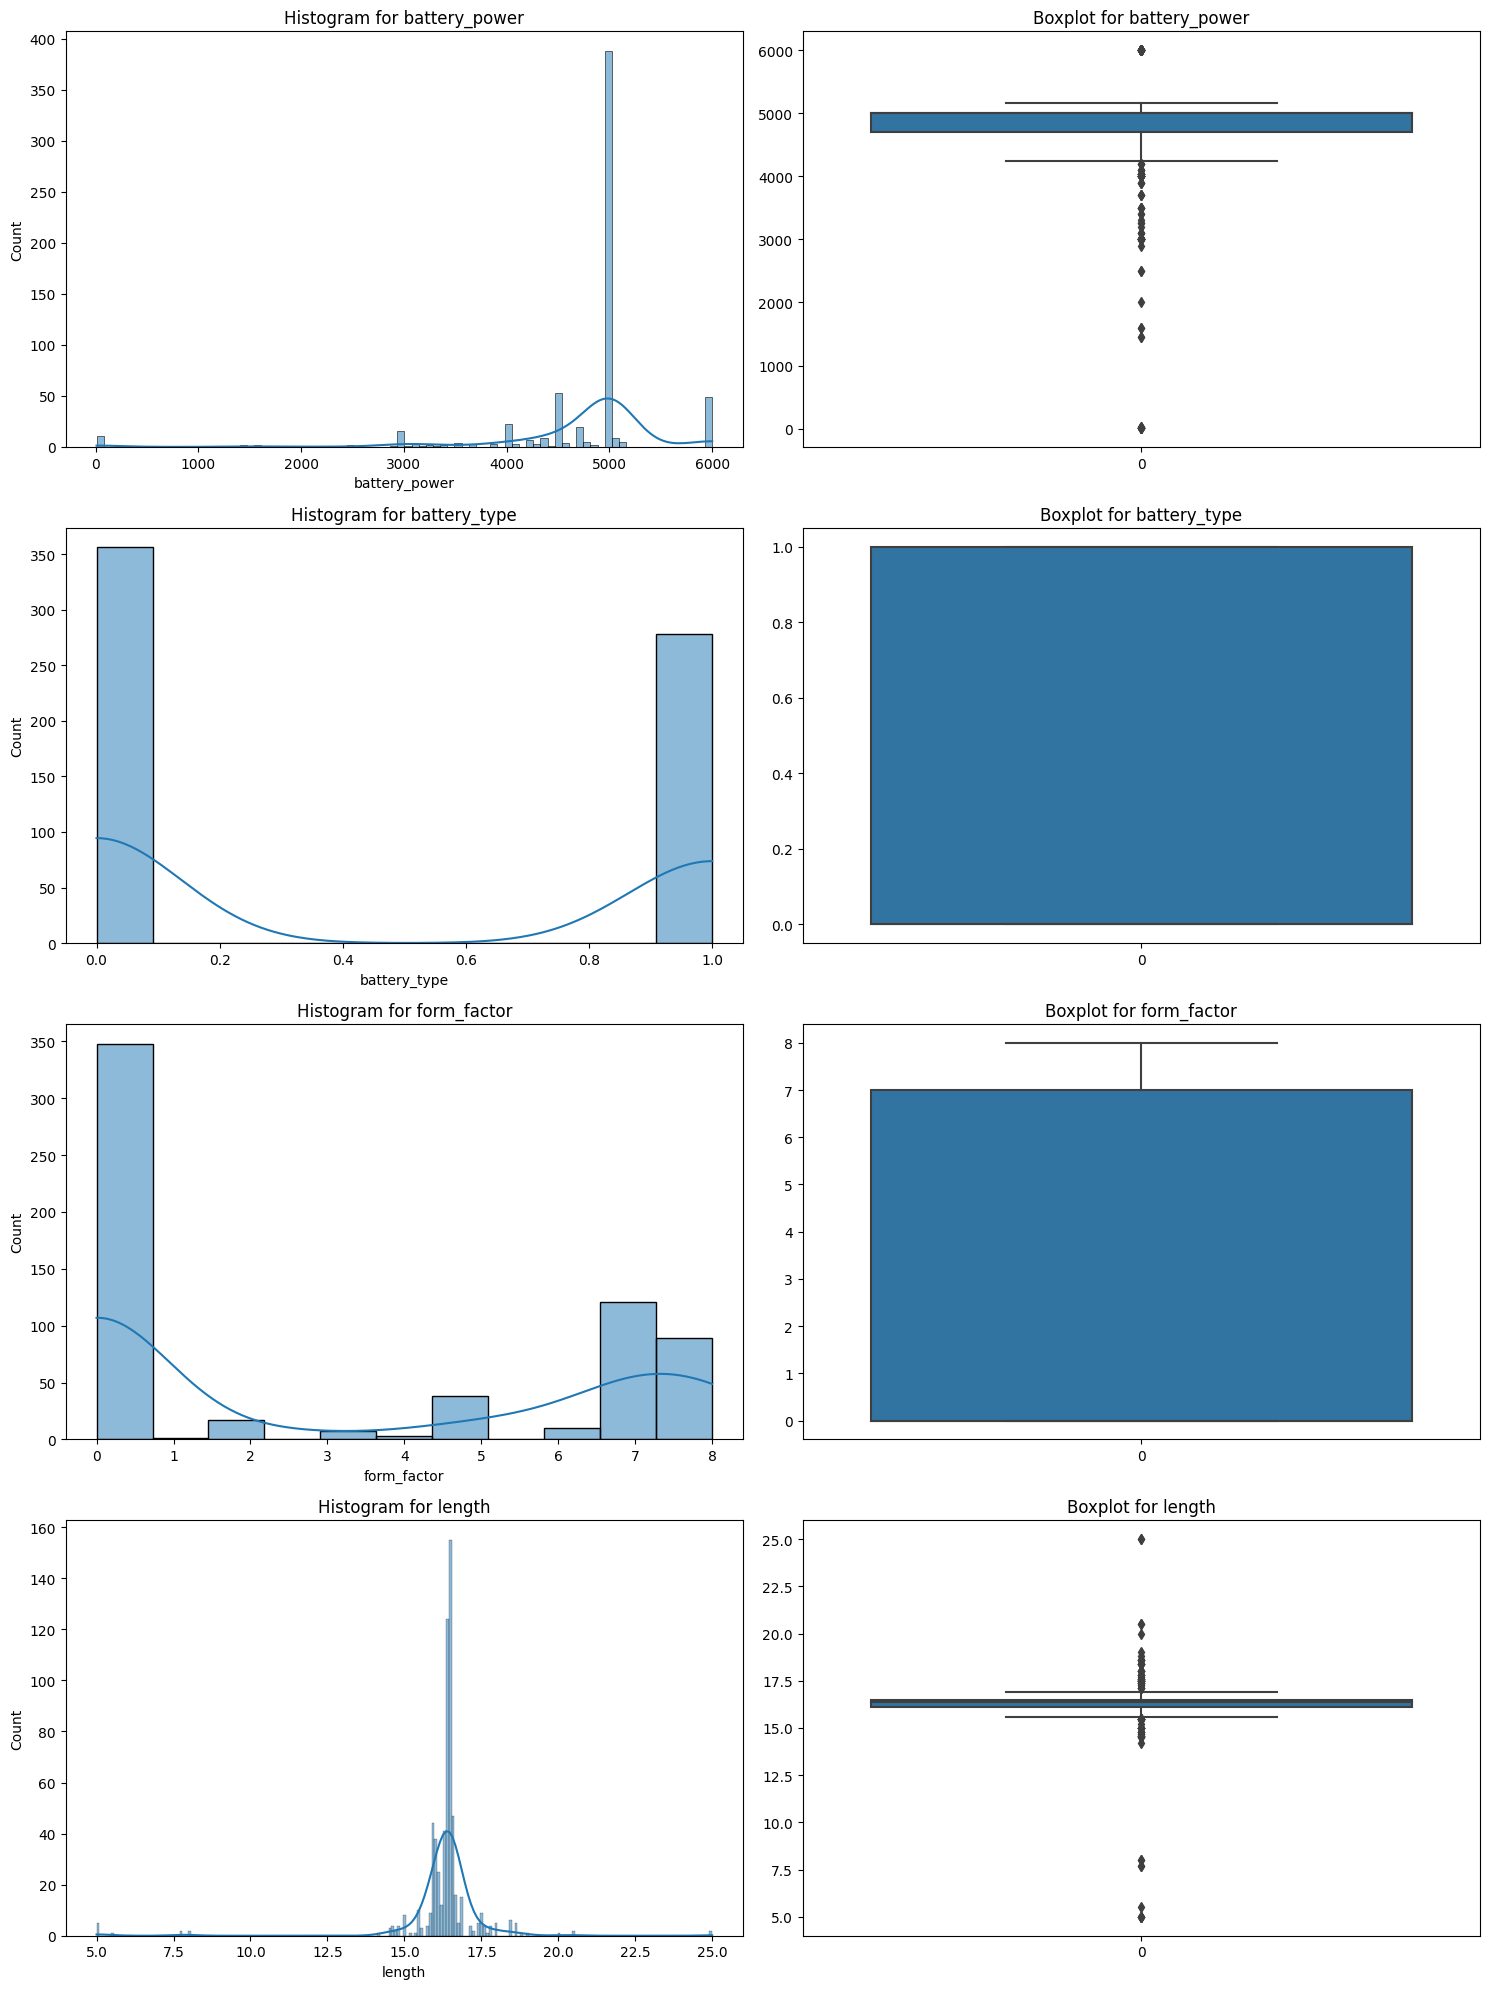

In [12]:
# Plot the next 4 features
plot_features(numerical_features, 4)

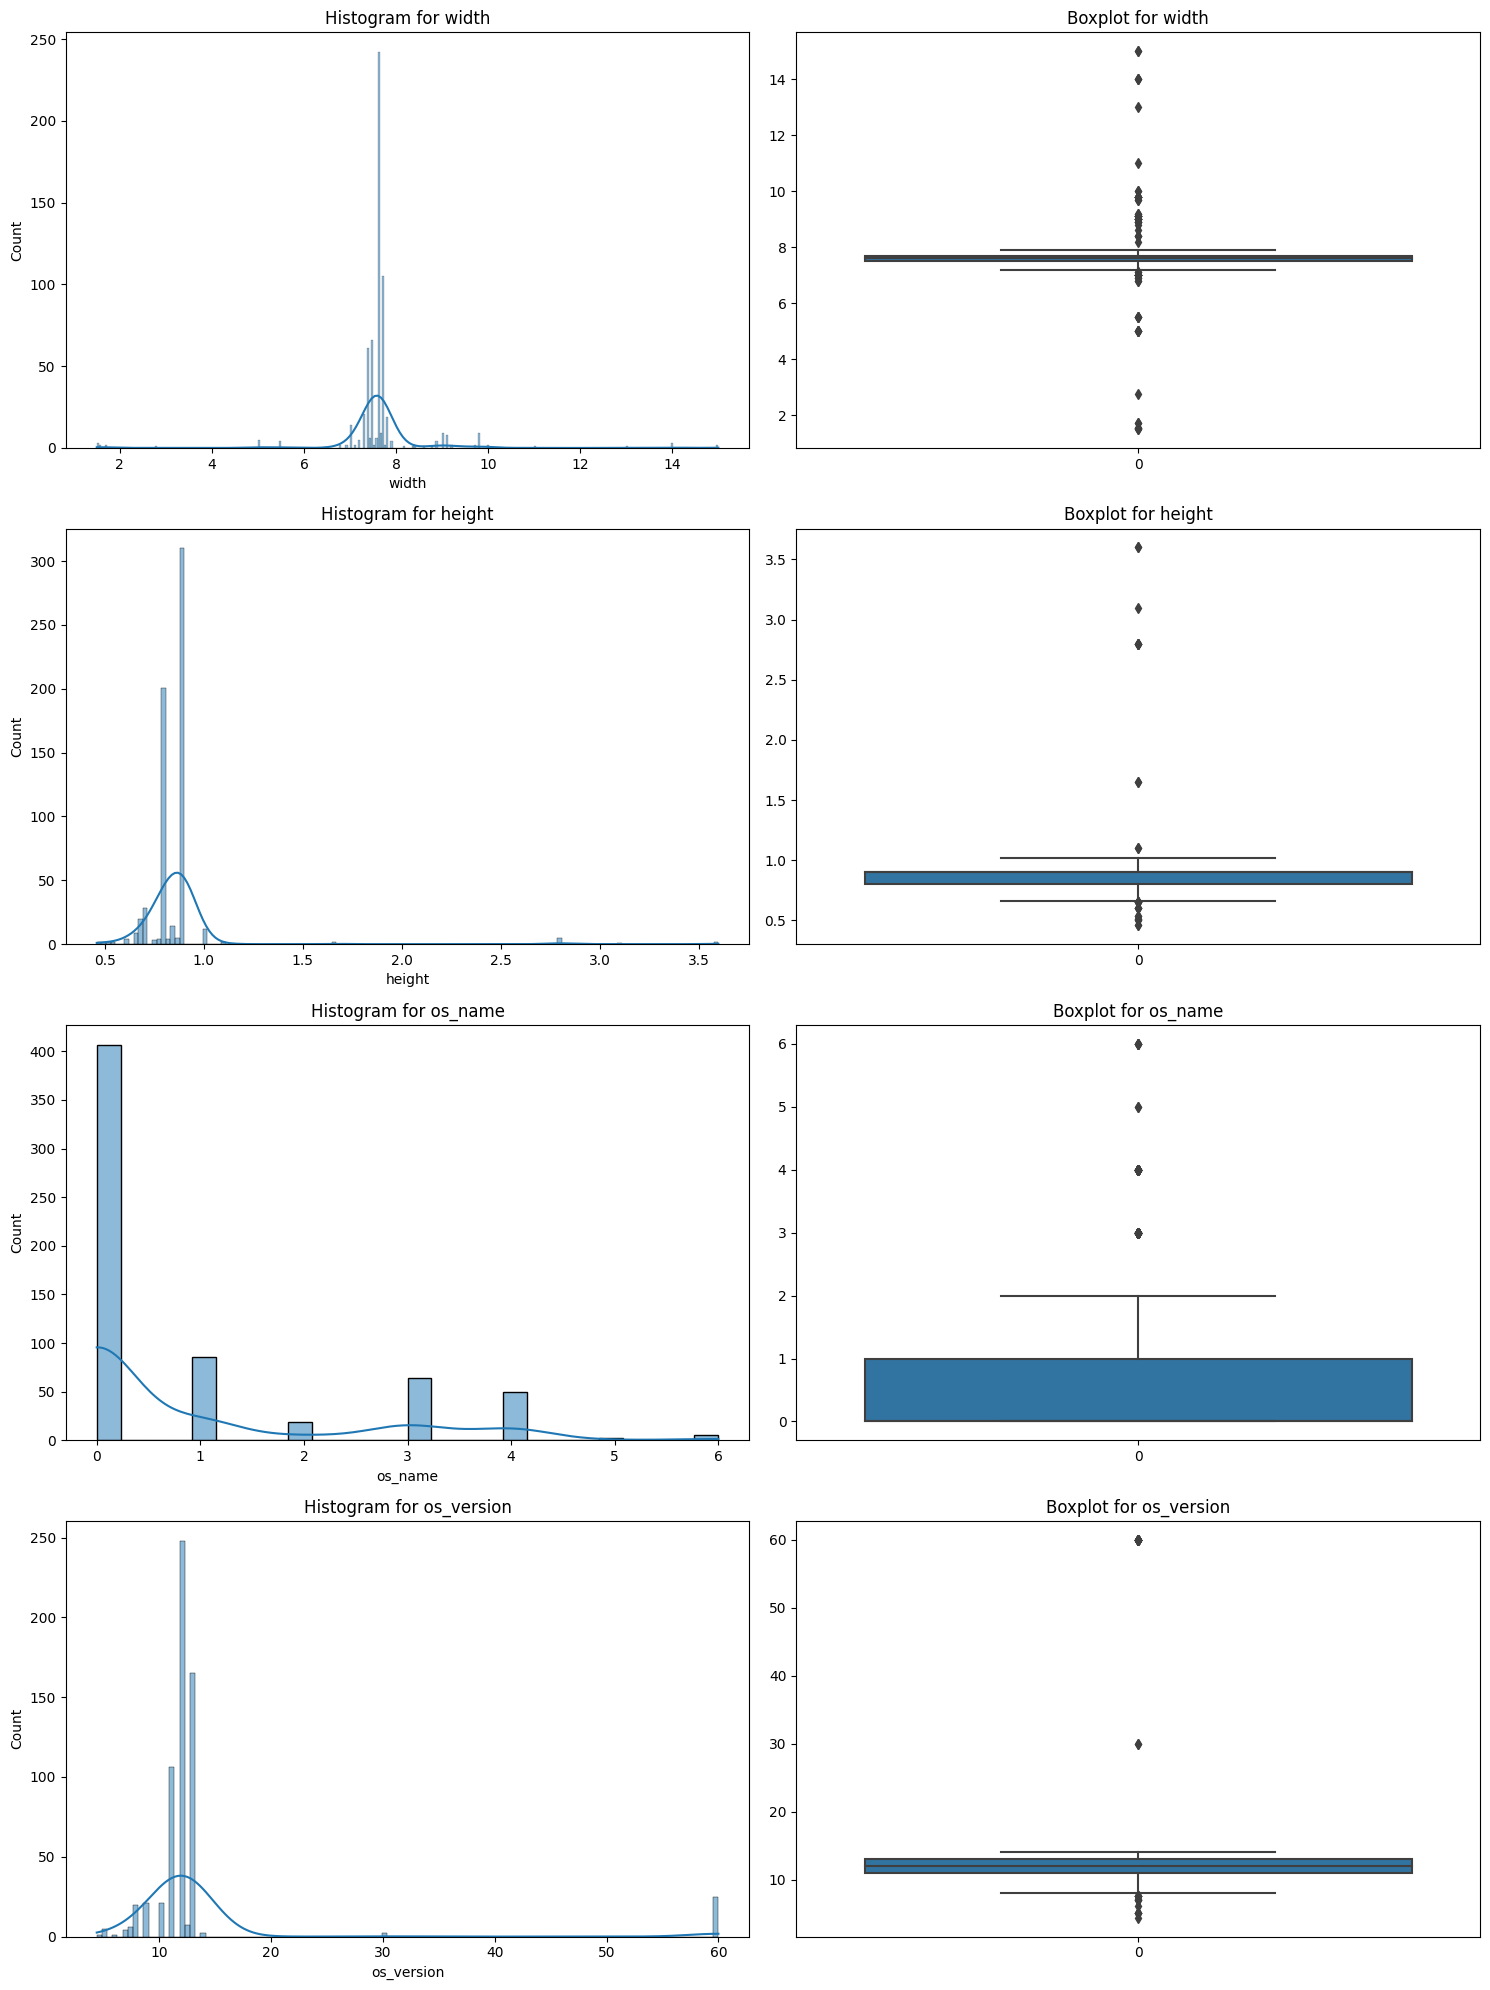

In [13]:
# Plot the next 4 features
plot_features(numerical_features, 8)

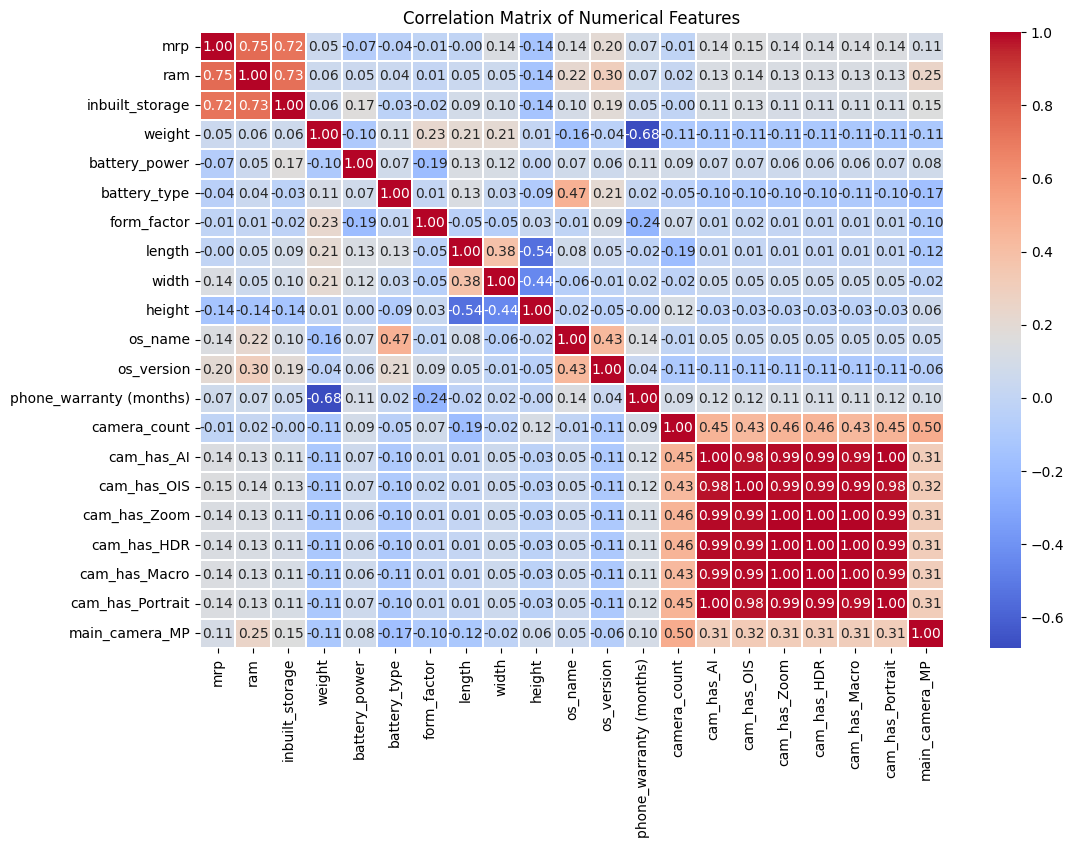

In [14]:
# Calculate the correlation matrix
corr_matrix = data[numerical_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


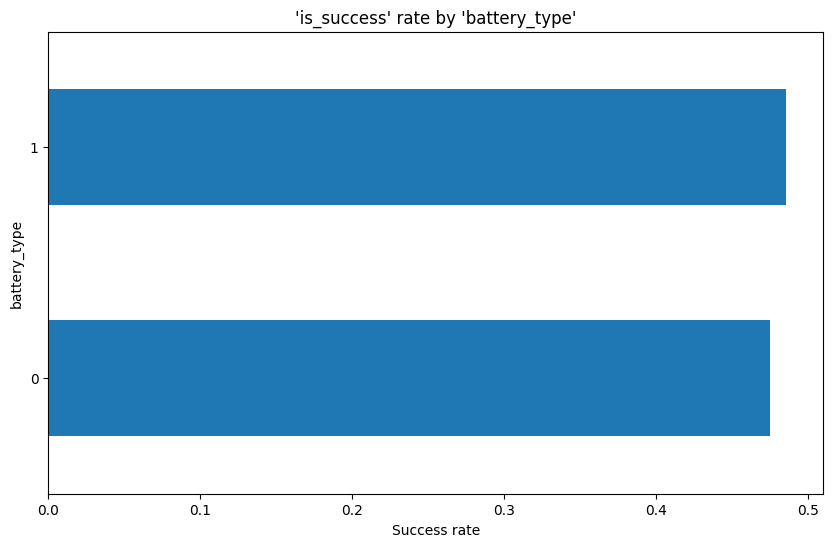

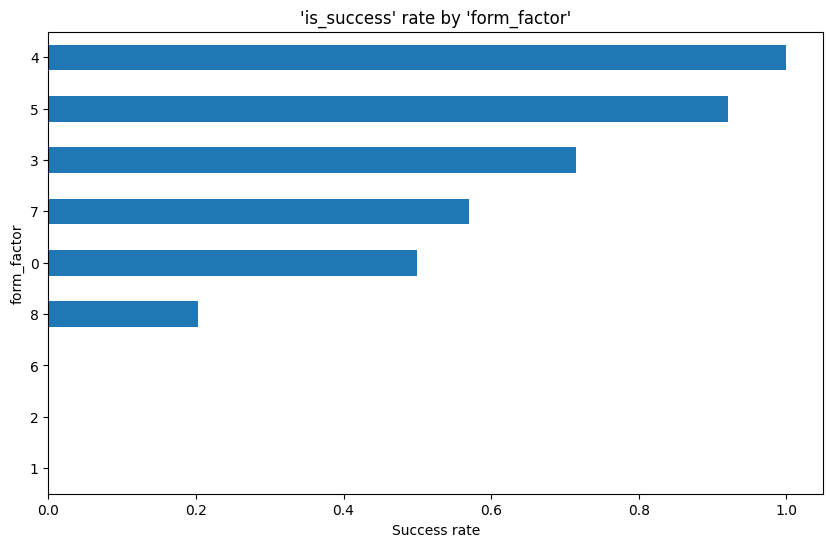

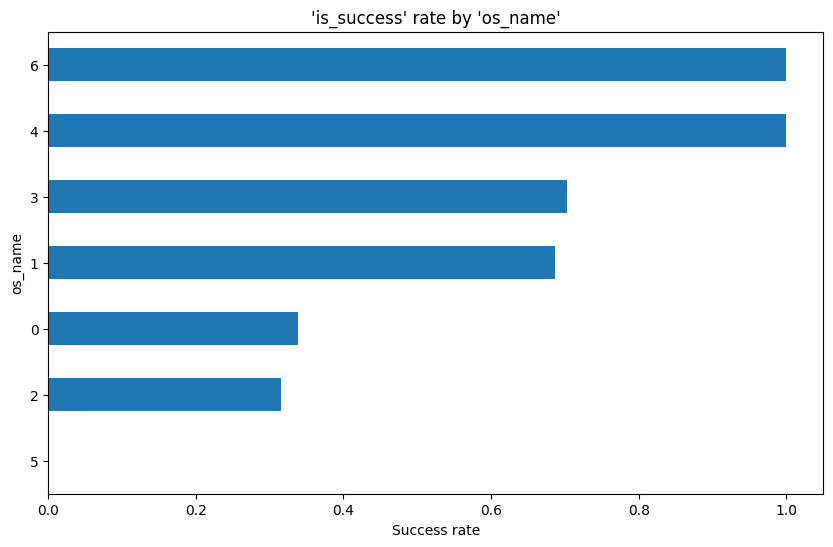

In [15]:
# Revised list of categorical features
categorical_features = ['battery_type', 'form_factor', 'os_name']

# Bivariate Analysis with the Target Variable

# Bar plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    data.groupby(feature)['is_success'].mean().sort_values().plot(kind='barh')
    plt.title(f"'is_success' rate by '{feature}'")
    plt.xlabel('Success rate')
    plt.ylabel(feature)
    plt.show()

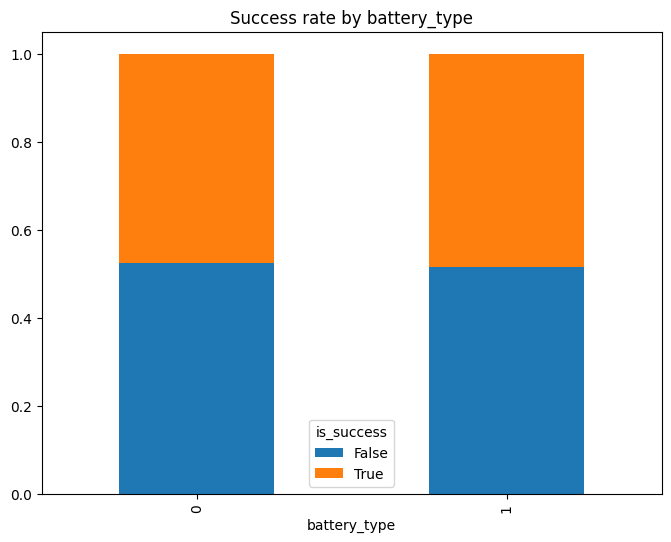

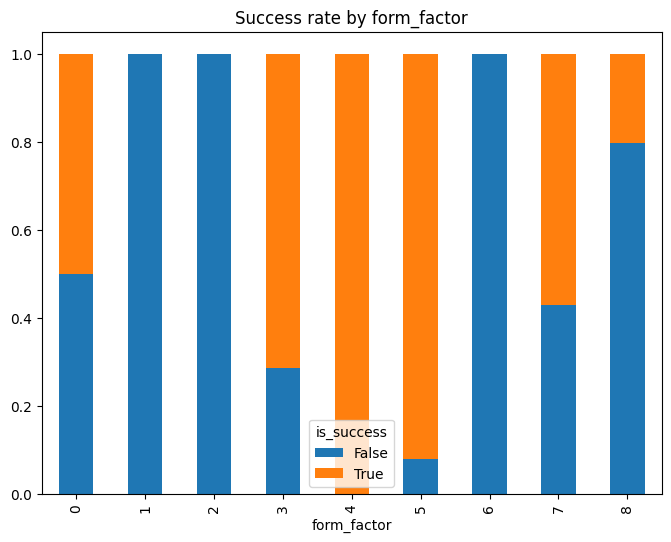

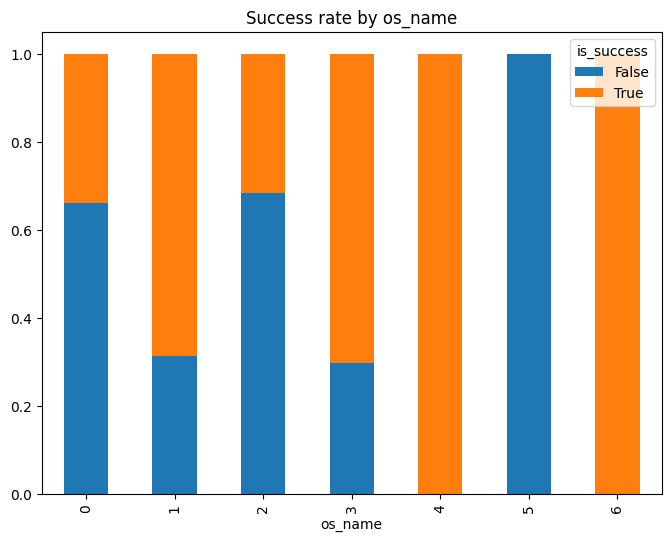

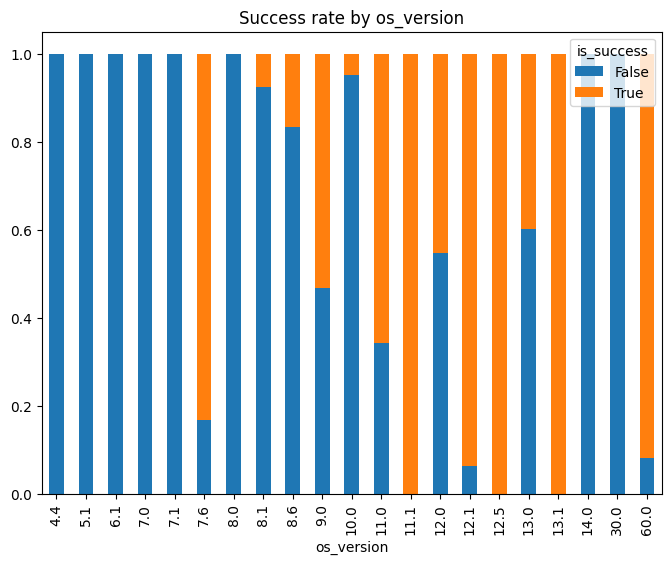

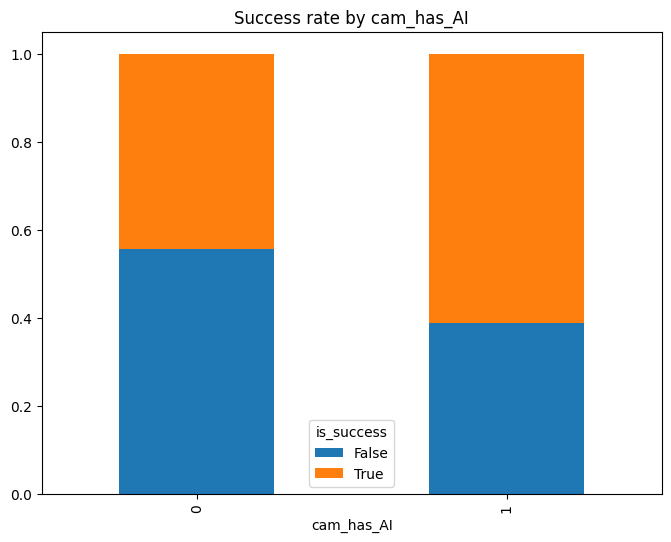

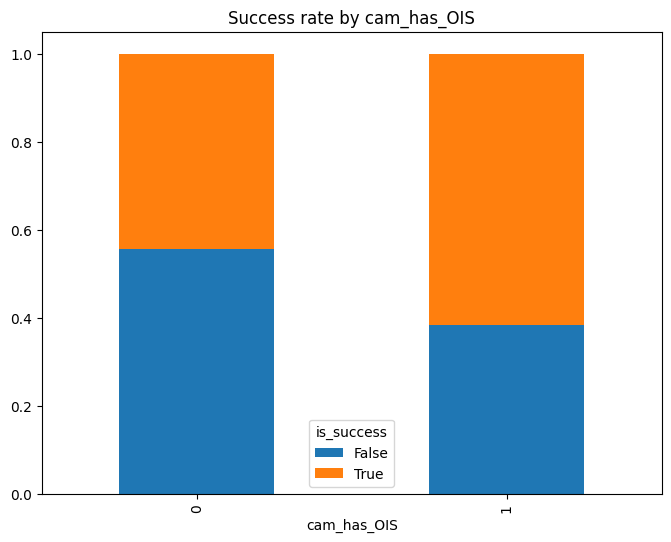

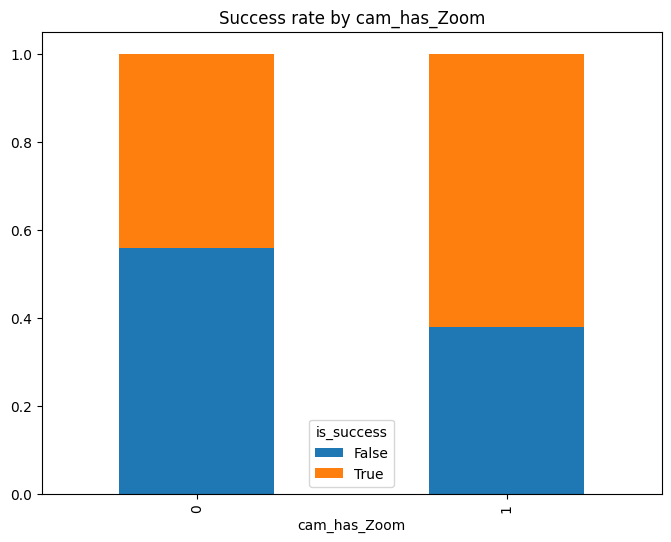

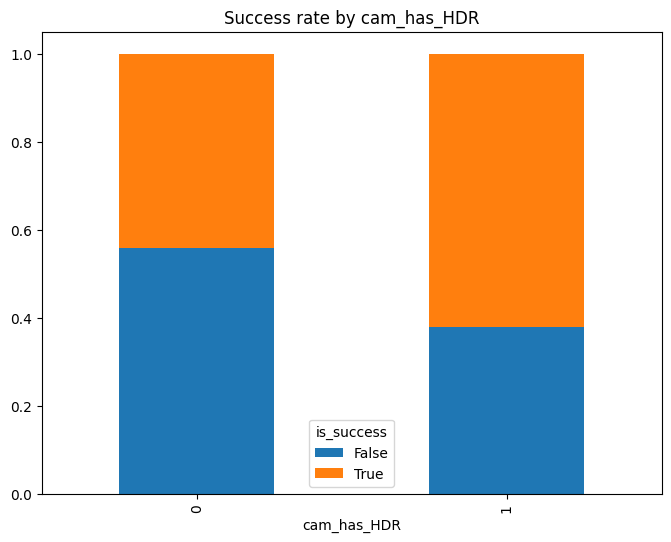

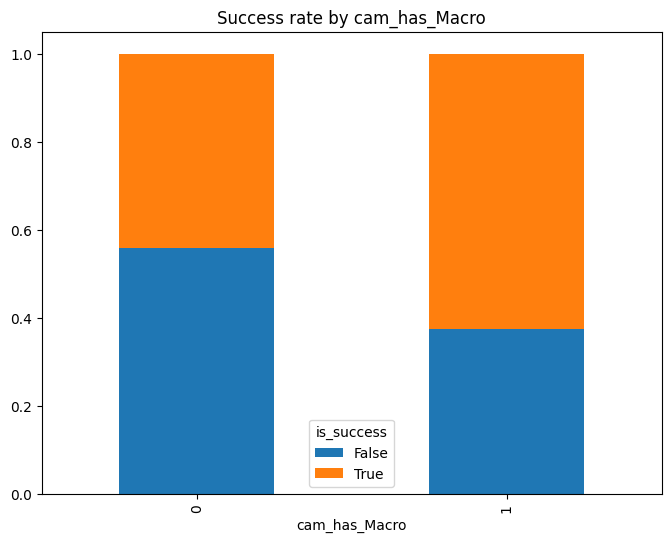

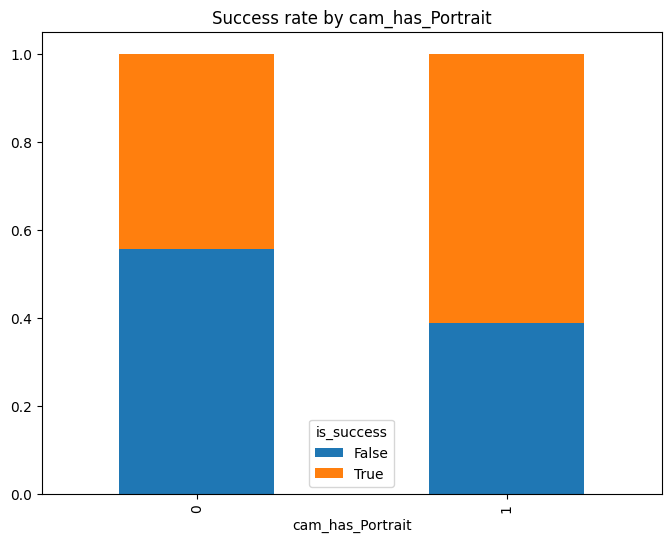

In [16]:
# Define categorical features
categorical_features = ['battery_type', 'form_factor', 'os_name', 'os_version', 'cam_has_AI', 'cam_has_OIS', 'cam_has_Zoom', 'cam_has_HDR', 'cam_has_Macro', 'cam_has_Portrait']

# Create bar plots for each categorical feature vs the target variable
for feature in categorical_features:
    cross_tab = pd.crosstab(data[feature], data['is_success'], normalize='index').reset_index()
    cross_tab.plot(x=feature, kind='bar', stacked=True, title=f'Success rate by {feature}', figsize=(8, 6))


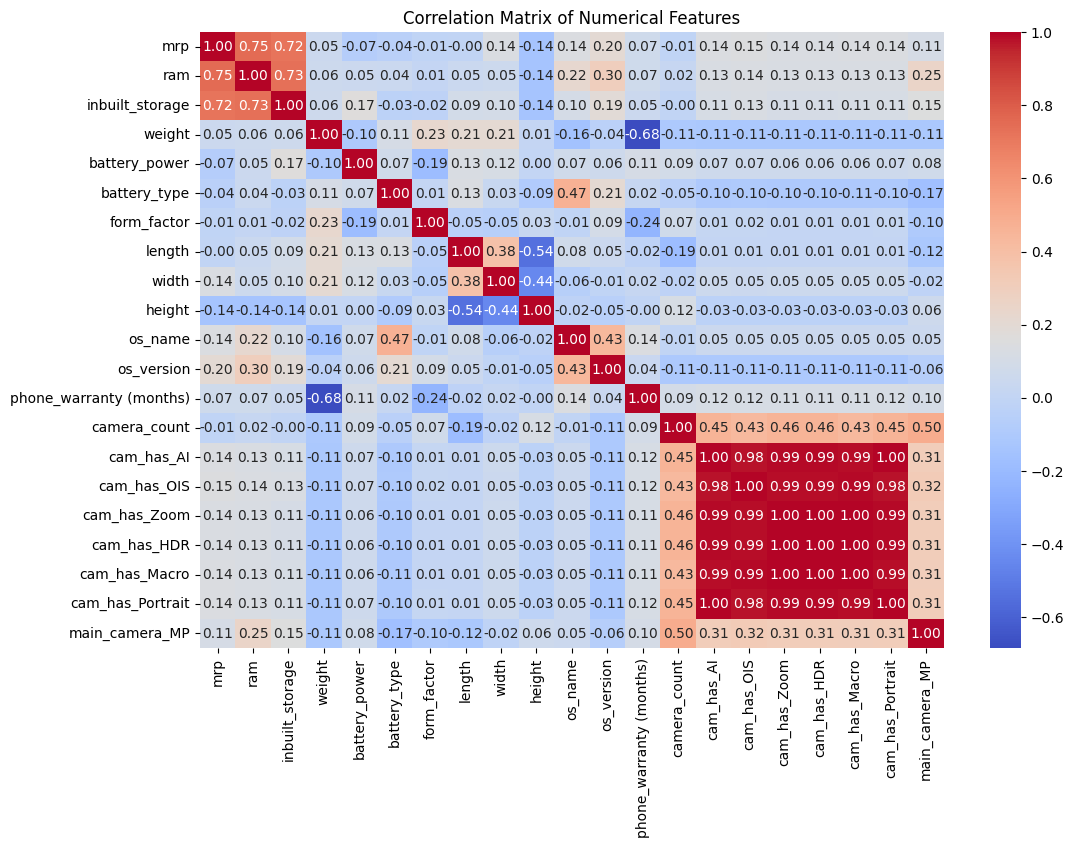

In [17]:
# Multivariate Analysis

# Let's start by looking at the correlation between the numerical features
corr_matrix = data[numerical_features].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


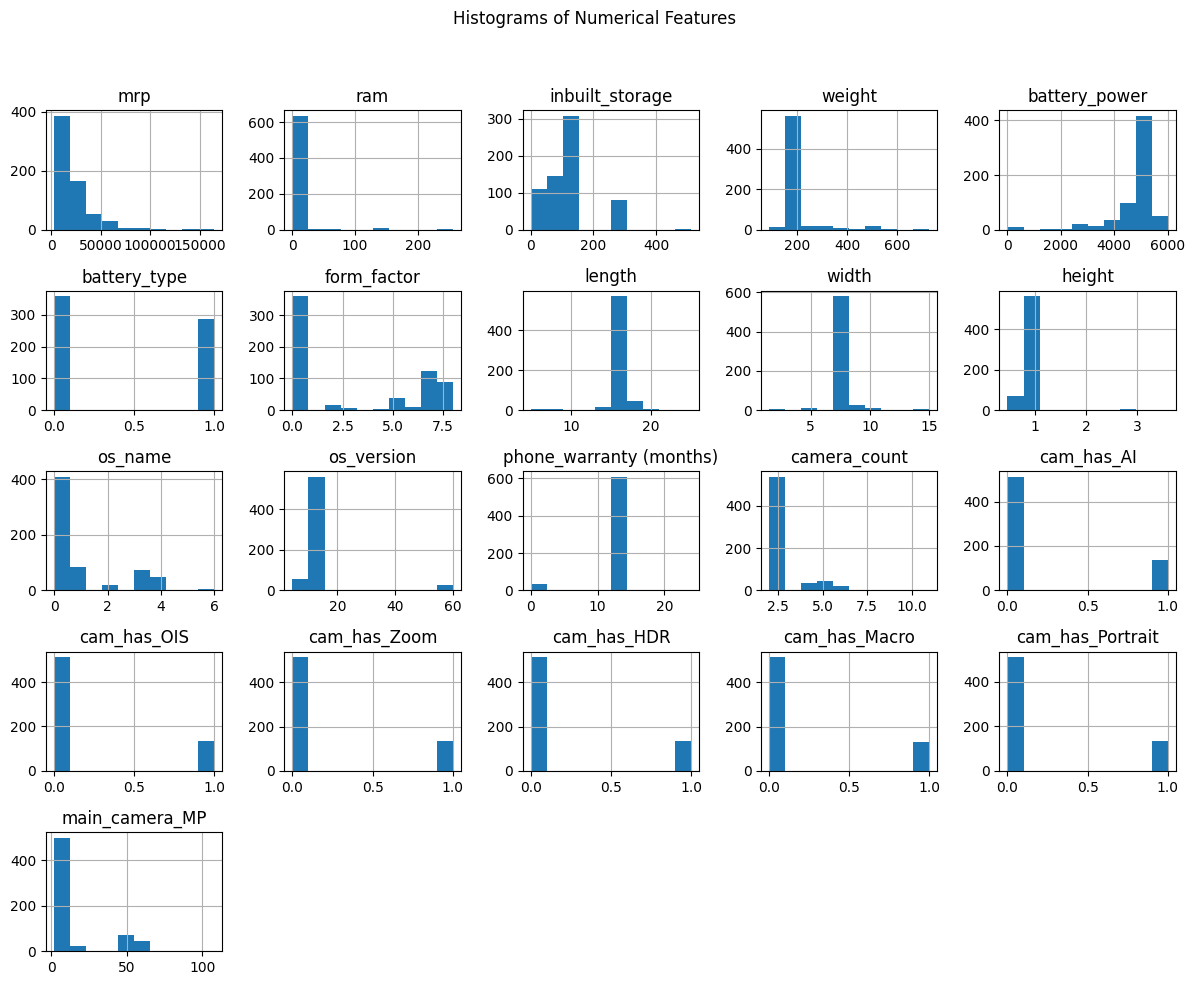

In [10]:
# Histograms for numerical features
df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

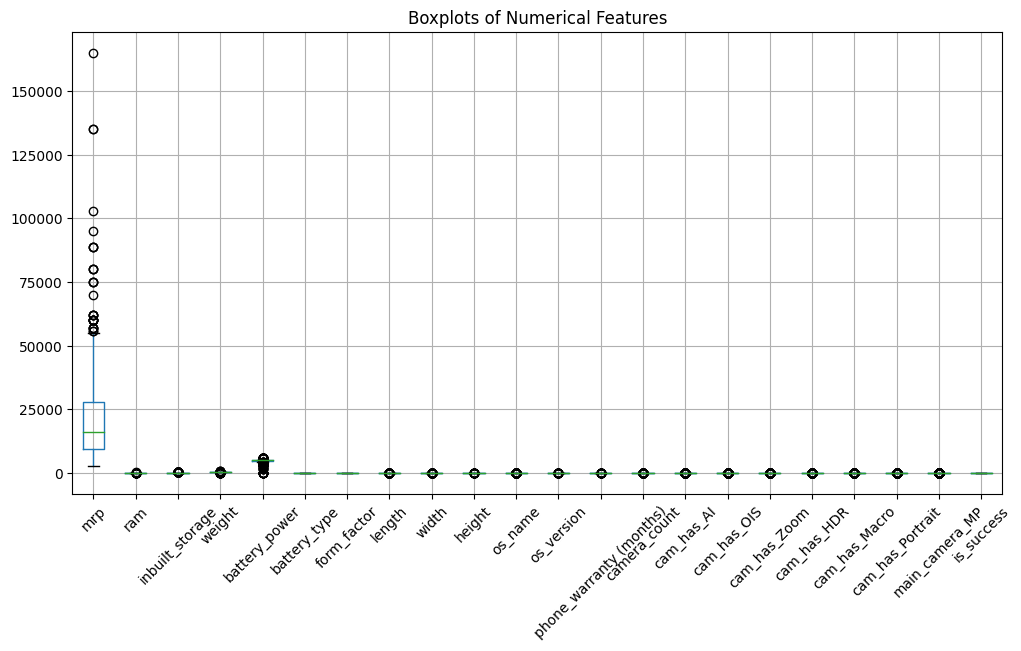

In [11]:
# Boxplots for numerical features
df.boxplot(figsize=(12, 6))
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()


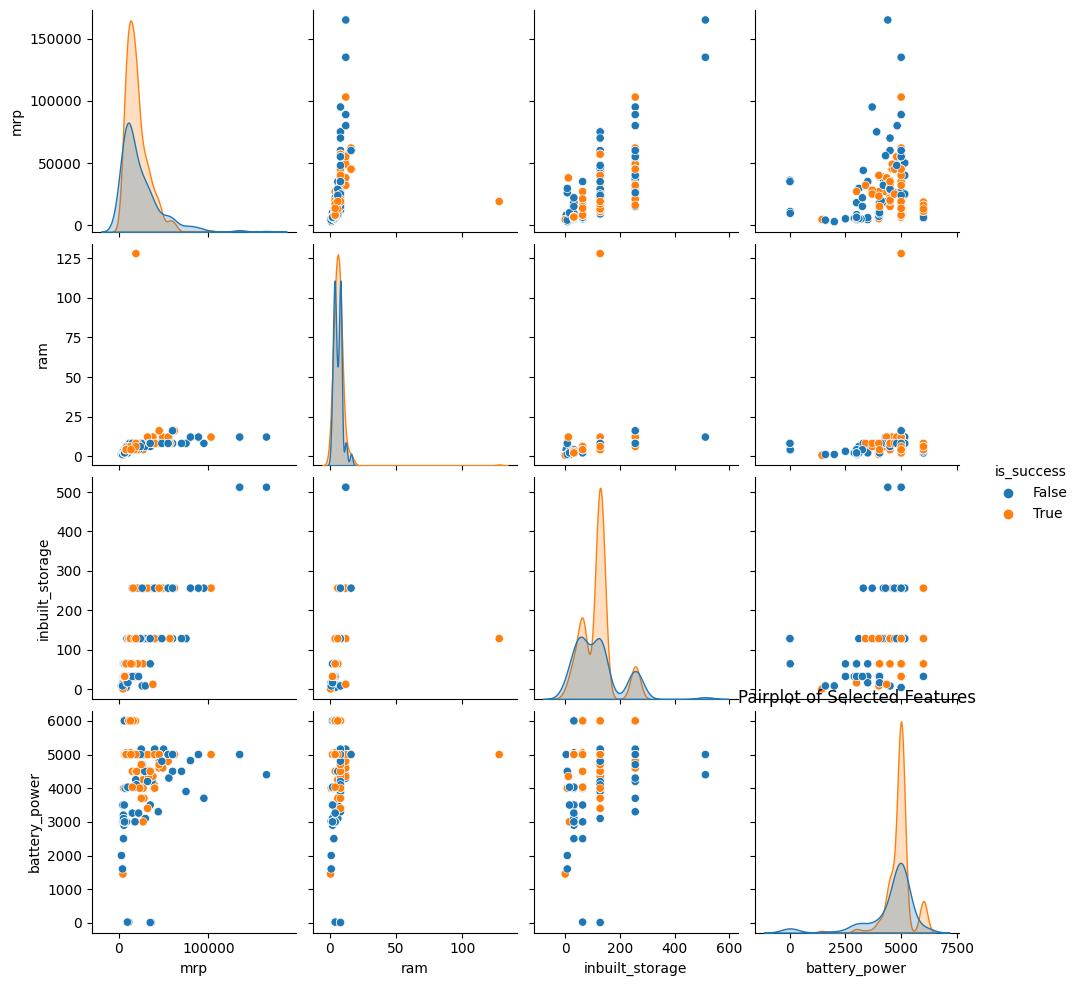

In [9]:
# Pairplot for selected features
sns.pairplot(df[['mrp', 'ram', 'inbuilt_storage', 'battery_power', 'is_success']], hue='is_success')
plt.title('Pairplot of Selected Features')
plt.show()

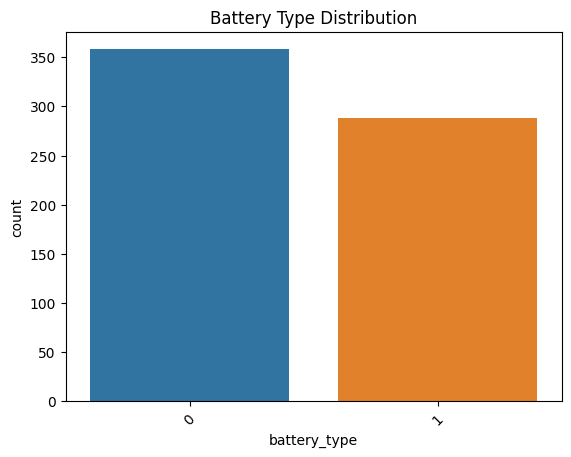

In [12]:
# Bar plots for categorical features
sns.countplot(x='battery_type', data=df)
plt.title('Battery Type Distribution')
plt.xticks(rotation=45)
plt.show()

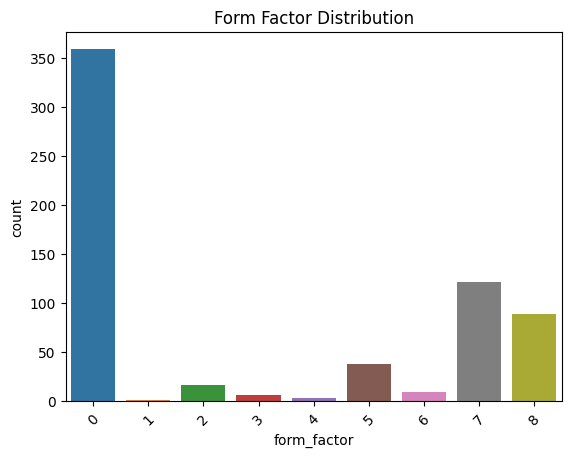

In [13]:
sns.countplot(x='form_factor', data=df)
plt.title('Form Factor Distribution')
plt.xticks(rotation=45)
plt.show()


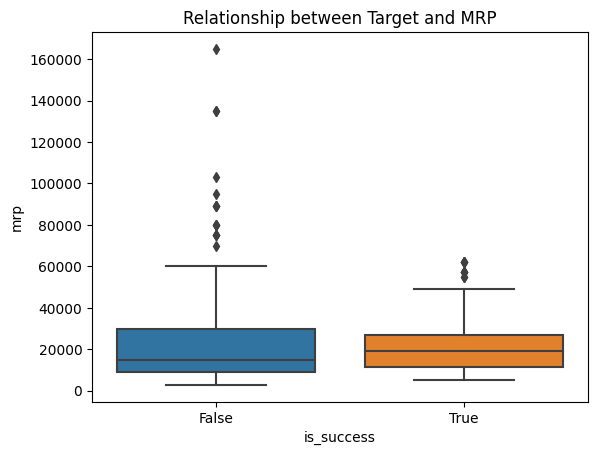

In [14]:
# Explore relationships between features and target
sns.boxplot(x='is_success', y='mrp', data=df)
plt.title('Relationship between Target and MRP')
plt.show()

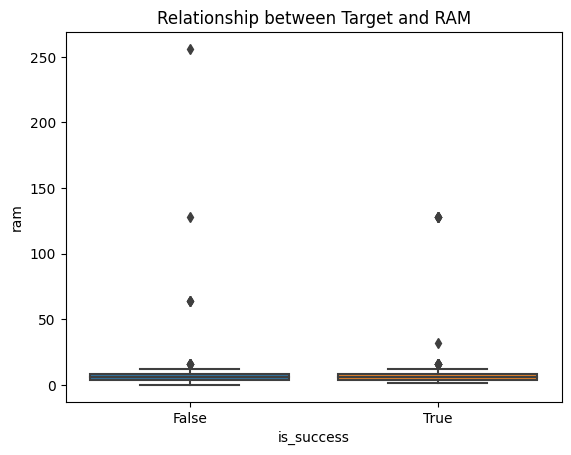

In [15]:
sns.boxplot(x='is_success', y='ram', data=df)
plt.title('Relationship between Target and RAM')
plt.show()

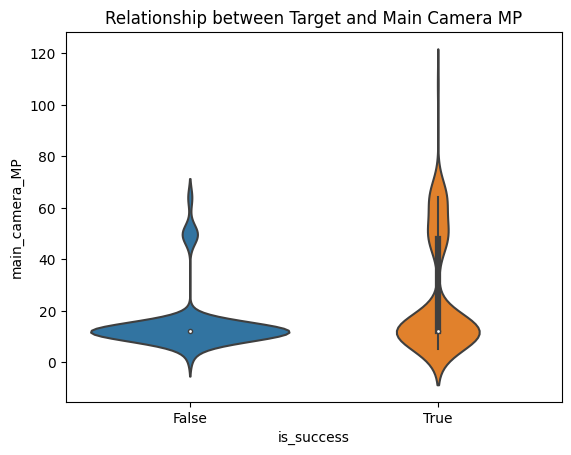

In [16]:
sns.violinplot(x='is_success', y='main_camera_MP', data=df)
plt.title('Relationship between Target and Main Camera MP')
plt.show()


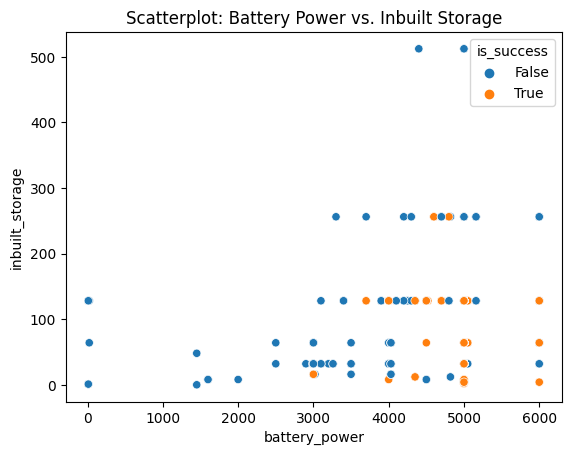

In [17]:
# Additional charts and visualizations
sns.scatterplot(x='battery_power', y='inbuilt_storage', hue='is_success', data=df)
plt.title('Scatterplot: Battery Power vs. Inbuilt Storage')
plt.show()

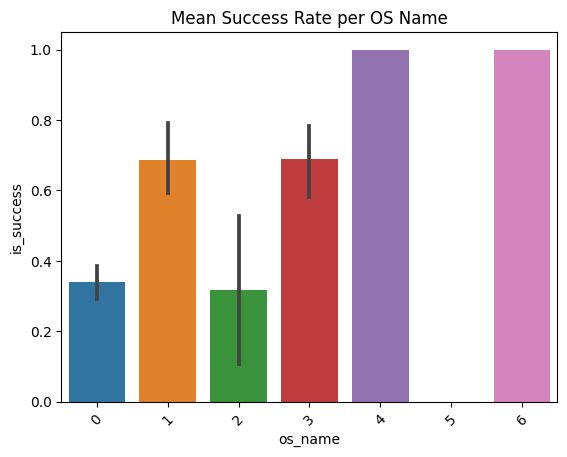

In [18]:
sns.barplot(x='os_name', y='is_success', data=df)
plt.title('Mean Success Rate per OS Name')
plt.xticks(rotation=45)
plt.show()

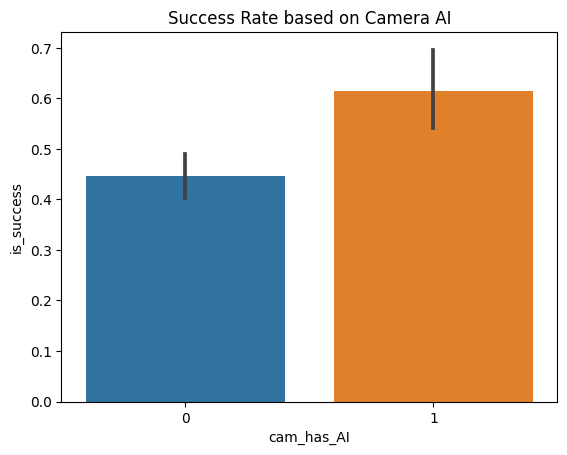

In [19]:
sns.barplot(x='cam_has_AI', y='is_success', data=df)
plt.title('Success Rate based on Camera AI')
plt.show()


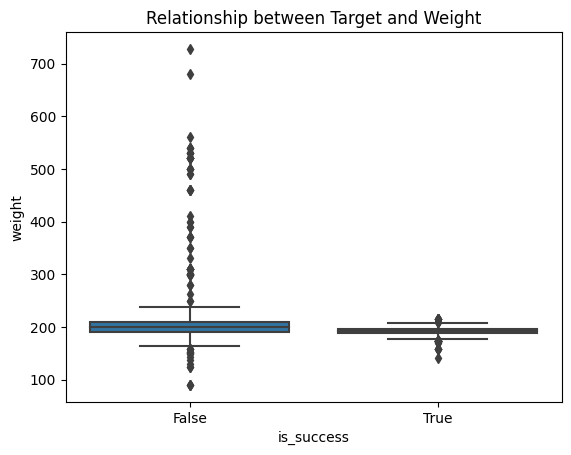

In [20]:
sns.boxplot(x='is_success', y='weight', data=df)
plt.title('Relationship between Target and Weight')
plt.show()

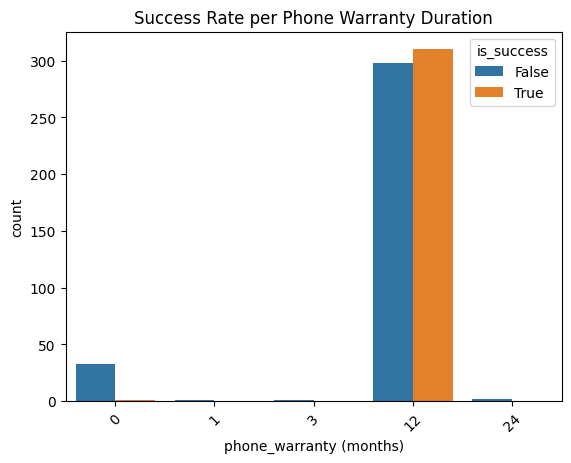

In [21]:
sns.countplot(x='phone_warranty (months)', hue='is_success', data=df)
plt.title('Success Rate per Phone Warranty Duration')
plt.xticks(rotation=45)
plt.show()

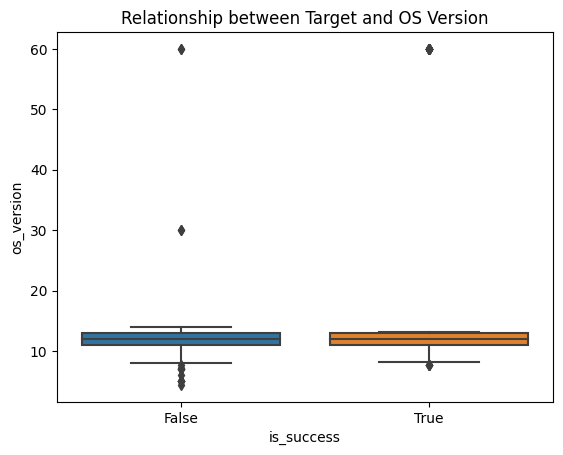

In [22]:
sns.boxplot(x='is_success', y='os_version', data=df)
plt.title('Relationship between Target and OS Version')
plt.show()

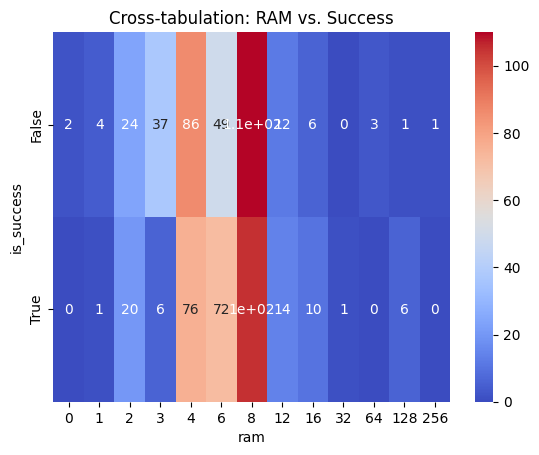

In [23]:
sns.heatmap(pd.crosstab(df['is_success'], df['ram']), annot=True, cmap='coolwarm')
plt.title('Cross-tabulation: RAM vs. Success')
plt.show()